# Notebook for loading in and formatting MEG/EEG Cichy Data

### Data from: https://figshare.com/collections/MEGEEG92_Objects_Dataset/4182587

#### Set up to read/write on LaCie External Drive
#### Put zipped data files into /volumes/LaCie/megeeg_zipped
#### Author: Zachary Goodale-Pirkle

VISUAL STIMULUS SET AND EXPERIMENTAL DESIGN
-------------------------------------------

The stimulus set consisted of 92 color photographs (Kiani et al., 2007;
Kriegeskorte et al., 2008b; Cichy et al., 2014, 2016b) of human and nonhuman
faces and bodies, as well as natural and artificial objects isolated
on a gray background. Participants viewed images presented at
the center of the screen (4 degrees visual angle) for 500 ms and overlaid with a
light gray fixation cross. Each participant completed 15 runs of 290 s
duration each. Every image was presented twice in each run in random
order, and the inter-trial interval (ITI) was set randomly to 1.0 or 1.1 s
with equal probability. Participants were asked to maintain fixation and
to press a button and blink their eyes in response to a paper clip image
shown randomly every 3 to 5 trials (average 4). The paper clip image was
not part of the 92 image set, and paper clip trials were excluded from
further analysis.


MEG AND EEG ACQUISITION AND PREPROCESSING
-----------------------------------------

MEG and EEG signals were acquired simultaneously. We recorded
MEG signals from 306 sensors (204 planar gradiometers, 102 magnetometers,
Elekta Neuromag TRIUX, Elekta, Stockholm), and EEG
signals from 74 sensors (custom-made cap with MEG compatible Ag/
AgCl sensors; Easycap, Germany; sensor layout in Supplementary
Fig. 1). Acquisition was continuous with a sampling rate of 1000 Hz,
and MEG/EEG data was filtered online between 0.03 and 330 Hz. Raw
MEG data was preprocessed using Maxfilter software (Elekta, Stockholm)
to perform noise reduction with spatiotemporal filters and head
movement compensation (Taulu et al., 2004; Taulu and Simola, 2006).
We applied default parameters (harmonic expansion origin in head
frame = [0 0 40] mm; expansion limit for internal multipole base = 8;
expansion limit for external multipole base = 3; bad sensors automatically
excluded from harmonic expansions = 7 s.d. above average;
temporal correlation limit = 0.98; buffer length = 10 s).

For more details, please refer to:
Cichy RM, Pantazis D. Multivariate pattern analysis of MEG and EEG: a comparison of representational structure in time and space. NeuroImage (2017); 158:441-454

In [1]:
# imports
%matplotlib inline
import os
import os.path as op
import numpy as np
import scipy.io as sio
import zipfile
import re
import mne
import matplotlib.pyplot as plt
from mne.io import read_raw_fif, concatenate_raws

In [2]:
#Some variables to set
subj_num = '16' # change number to match subj data - use a leading zero when subj_num < 10
data_path = "/volumes/LaCie/megeeg_raw/subj" + subj_num #where you want to write the unzipped raw files to
new_filename = 'megeeg_subj'+subj_num+'-' #what to name the unzipped raw files

# If you have already extracted the files , skip the next cell and make sure data_path points to the directory 
# that contains them. If you have already renamed them, skip the following cell as well.

In [3]:
# extract all files
data_path = "/volumes/LaCie/megeeg_raw/subj" + subj_num #where you want to write the unzipped raw files to
zip = zipfile.ZipFile("/Volumes/LaCie/megeeg_zipped/subj"+subj_num+".zip", 'r') #insert the location of the zipped files
zip.extractall(data_path)
zip.close()

In [4]:
#rename files to comply with MNE naming conventions
new_filename = 'megeeg_subj'+subj_num+'-' #what to name the unzipped raw files
for inx, filename in enumerate(os.listdir(data_path)):
    os.rename(data_path + '/' + filename, data_path + '/' + new_filename+ str(inx) + '_raw.fif')

In [5]:
#use MNE to load and format raw .fif files
n_runs = 4  # 4 for full data (use less to speed up computations)
fname = op.join(data_path, new_filename + '%i_raw.fif')
raws = [read_raw_fif(fname % block) for block in range(n_runs)]
raw = concatenate_raws(raws)

data, times = raw[:] 

Opening raw data file /volumes/LaCie/megeeg_raw/subj16/megeeg_subj16-0_raw.fif...
    Range : 121000 ... 1408999 =    121.000 ...  1408.999 secs
Ready.
Current compensation grade : 0
Opening raw data file /volumes/LaCie/megeeg_raw/subj16/megeeg_subj16-1_raw.fif...
    Range : 1409000 ... 2696999 =   1409.000 ...  2696.999 secs
Ready.
Current compensation grade : 0
Opening raw data file /volumes/LaCie/megeeg_raw/subj16/megeeg_subj16-2_raw.fif...
    Range : 2697000 ... 3984999 =   2697.000 ...  3984.999 secs
Ready.
Current compensation grade : 0
Opening raw data file /volumes/LaCie/megeeg_raw/subj16/megeeg_subj16-3_raw.fif...
    Range : 3985000 ... 4806999 =   3985.000 ...  4806.999 secs
Ready.
Current compensation grade : 0


In [6]:
# get the shape of the data
data.shape

(397, 4686000)

In [7]:
# get all of the channel names
raw.ch_names

['EEG001',
 'EEG002',
 'EEG003',
 'EEG004',
 'EEG005',
 'EEG006',
 'EEG007',
 'EEG008',
 'EEG009',
 'EEG010',
 'EEG011',
 'EEG012',
 'EEG013',
 'EEG014',
 'EEG015',
 'EEG016',
 'EEG017',
 'EEG018',
 'EEG019',
 'EEG020',
 'EEG021',
 'EEG022',
 'EEG023',
 'EEG024',
 'EEG025',
 'EEG026',
 'EEG027',
 'EEG028',
 'EEG029',
 'EEG030',
 'EEG031',
 'EEG032',
 'EEG033',
 'EEG034',
 'EEG035',
 'EEG036',
 'EEG037',
 'EEG038',
 'EEG039',
 'EEG040',
 'EEG041',
 'EEG042',
 'EEG043',
 'EEG044',
 'EEG045',
 'EEG046',
 'EEG047',
 'EEG048',
 'EEG049',
 'EEG050',
 'EEG051',
 'EEG052',
 'EEG053',
 'EEG054',
 'EEG055',
 'EEG056',
 'EEG057',
 'EEG058',
 'EEG059',
 'EEG060',
 'EEG061',
 'EEG062',
 'EEG063',
 'EEG064',
 'EEG065',
 'EEG066',
 'EEG067',
 'EEG068',
 'EEG069',
 'EEG070',
 'EEG071',
 'EEG072',
 'EEG073',
 'EEG074',
 'MEG0111',
 'MEG0112',
 'MEG0113',
 'MEG0121',
 'MEG0122',
 'MEG0123',
 'MEG0131',
 'MEG0132',
 'MEG0133',
 'MEG0141',
 'MEG0142',
 'MEG0143',
 'MEG0211',
 'MEG0212',
 'MEG0213',
 'MEG0

#### other channels in raw: 
* 'MISC007','MISC008','MISC009','MISC010','MISC011','MISC012', 'STI101', 'SYS201',
* 'CHPI001','CHPI002','CHPI003','CHPI004','CHPI005','CHPI006','CHPI007','CHPI008',CHPI009'

In [8]:
# find all of the events in the raw data
events = mne.find_events(raw, min_duration=.002)
# create a limited events list that only contains events corresponding to image trials
limited_events = []
for event in events:
    if event[2] <= 92:
        limited_events.append(event)
limited_events = np.array(limited_events)
limited_events.shape        

4167 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]


(2760, 3)

MEG and EEG event codes
-----------------------

* 1-92: onset of 92 image stimuli
* 93: onset of paperclip (catch trials)
* 222: button press
* other values: spurious triggers due to hardware limitations

In [9]:
# pick which types of channels to use (EEG, MEG) and epoch the data
preload = False #If you already have epo.fif files, set to 'True' to load them in
if preload:
    subj_num = subj_num #change to the subject whose data you want to load in
    epoch_path = "/volumes/LaCie/megeeg_preload/epochs/subj"+subj_num+"_epo.fif" #point to epo.fif files
    epochs = mne.read_epochs(epoch_path, preload=True)
else:
    picks = mne.pick_types(raw.info, meg=False, eeg=True)
    baseline = (None, None)      #WHAT SHOULD THIS BE?
    reject = dict(eeg=150e-6)   #WHAT SHOULD THIS BE? 3 standard deviations away from mean, so calculate mean and do interval [mean - 3stnDev, mean + 3stnDev]
    epochs = mne.Epochs(raw, events=limited_events, baseline=baseline,
                        picks=picks, reject=reject, tmin=-.1, tmax=.500, preload=True) 

2760 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 2760 events and 601 original time points ...
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG027', 'EEG038']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG029', 'EEG030', 'EEG031', 'EEG032', 'EEG033', 'EEG034', 'EEG037', 'EEG039', 'EEG040', 'EEG041', 'EEG042', 'EEG043', 'EEG044', 'EEG049', 'EEG050', 'EEG051', 'EEG052', 'EEG053', 'EEG054', 'EEG061', 'EEG062', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG016', 'EEG017', 'EEG026', 'EEG027', 'EEG028', 'EEG037']
    Rejecting  epoch based on EEG : ['EEG068']
    

    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG036', 'EEG047']
    Rejecting  epoch based on EEG : ['EEG022', 'EEG023', 'EEG024', 'EEG032', 'EEG033', 'EEG034', 'EEG035', 'EEG036', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG010']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001']
    Rejecting  epoch based on EEG : ['EEG009', 'EEG010', 'EEG035', 'EEG036', 'EEG045', 'EEG046', 'EEG047', 'EEG048', 'EEG049', 'EEG050', 'EEG051', 'EEG056', 'EEG057', 'EEG058', 'EEG059', 'EEG060', 'EEG061', 'EEG062', 'EEG064', 'EEG065', 'EEG066', 'EEG067', 'EEG068', 'EEG069', 'EEG070', 'EEG071', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG016', 'EEG017', 'EEG

    Rejecting  epoch based on EEG : ['EEG003', 'EEG007', 'EEG008', 'EEG015', 'EEG016', 'EEG017', 'EEG026', 'EEG027', 'EEG028', 'EEG039']
    Rejecting  epoch based on EEG : ['EEG004', 'EEG008', 'EEG009', 'EEG010', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG029', 'EEG030', 'EEG031', 'EEG032', 'EEG036', 'EEG037', 'EEG038', 'EEG041', 'EEG042', 'EEG051', 'EEG069']
    Rejecting  epoch based on EEG : ['EEG009', 'EEG017']
    Rejecting  epoch based on EEG : ['EEG040']
    Rejecting  epoch based on EEG : ['EEG017']
    Rejecting  epoch based on EEG : ['EEG050', 'EEG061', 'EEG069']
    Rejecting  epoch based on EEG : ['EEG050']
    Rejecting  epoch based on EEG : ['EEG001']
    Rejecting  epoch based on EEG : ['EEG002', 'EEG003', 'EEG006', 'EEG007', 'EEG008', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG034', 'EEG035', 'EEG036', 'EEG037', 'EEG038', 'EEG039

    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG029', 'EEG030', 'EEG031', 'EEG032', 'EEG033', 'EEG034', 'EEG035', 'EEG036', 'EEG037', 'EEG038', 'EEG039', 'EEG040', 'EEG041', 'EEG042', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047', 'EEG048', 'EEG049', 'EEG050', 'EEG051', 'EEG052', 'EEG053', 'EEG054', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG059', 'EEG060', 'EEG062', 'EEG063', 'EEG064', 'EEG065', 'EEG066', 'EEG067', 'EEG068', 'EEG069', 'EEG070', 'EEG071', 'EEG072']
    Rejecting  epoch based on EEG : ['EEG009', 'EEG010', 'EEG017', 'EEG019', 'EEG020']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008', 'EEG016', 'EEG017', 'EEG026', 'EEG027', 'EEG028']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG017', 'E

    Rejecting  epoch based on EEG : ['EEG027', 'EEG028', 'EEG037', 'EEG038', 'EEG039']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG061', 'EEG067', 'EEG068', 'EEG071', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG030', 'EEG031', 'EEG032', 'EEG033', 'EEG034', 'EEG035', 'EEG036', 'EEG037', 'EEG038', 'EEG041', 'EEG042', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047', 'EEG048', 'EEG049', 'EEG052', 'EEG053', 'EEG054', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG059', 'EEG060', 'EEG063', 'EEG064', 'EEG065', 'EEG066', 'EEG069', 'EEG070']
    Rejecting  epoch based on EEG : ['EEG002', 'EEG003', 'EEG005', 'EEG006', 'EEG007', 'EEG0

    Rejecting  epoch based on EEG : ['EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG015', 'EEG016', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG032', 'EEG033', 'EEG034', 'EEG035', 'EEG036', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047', 'EEG054', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG064', 'EEG065']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG007', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG004', 'EEG009', 'EEG010', 'EEG018', 'EEG019', 'EEG020', 'EEG030', 'EEG050']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG

    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG005', 'EEG008', 'EEG010', 'EEG011', 'EEG016', 'EEG017', 'EEG039', 'EEG071']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG030', 'EEG031', 'EEG032', 'EEG033', 'EEG034', 'EEG035', 'EEG036', 'EEG037', 'EEG038', 'EEG039', 'EEG042', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047', 'EEG048', 'EEG049', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG059', 'EEG060', 'EEG066', 'EEG071']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG032', 'EEG043']
    Rejec

    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008', 'EEG010', 'EEG015', 'EEG016', 'EEG017', 'EEG028', 'EEG068', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG007', 'EEG008', 'EEG016', 'EEG017', 'EEG068', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008', 'EEG016', 'EEG017', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['EEG061', 'EEG065', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG065', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG007', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG007', 'EEG008', 'EEG010', 'EEG016', 'EEG062', 'EEG063', 'EEG064', 'EEG065', 'EEG068', 'EEG069', 'EEG070', 'EEG072', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG050', 'EEG051', 'EEG062', 'EEG063', 'EEG064', 'EEG067', 'EEG068', 'EEG069', 'EEG070', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG007', 'EEG008', 'EEG016', 'EEG070', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG070', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG068', 'EEG073', 'EEG074

    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG043']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008', 'EEG010', 'EEG068', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG016', 'EEG017']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG019', 'EEG020', 'EEG021', 'EEG024', 'EEG025', 

    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG025', 'EEG026', 'EEG027', 'EEG038', 'EEG050', 'EEG061', 'EEG068', 'EEG070', 'EEG071', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG007', 'EEG008', 'EEG010', 'EEG015', 'EEG016', 'EEG017', 'EEG027', 'EEG039', 'EEG050', 'EEG059', 'EEG060', 'EEG061', 'EEG066', 'EEG067', 'EEG068', 'EEG069', 'EEG071', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG004', 'EEG008', 'EEG010', 'EEG070', 'EEG071', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG008', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008', 'EEG009']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', '

    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG030', 'EEG031', 'EEG032', 'EEG033', 'EEG034', 'EEG035', 'EEG036', 'EEG037', 'EEG038', 'EEG039', 'EEG042', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047', 'EEG048', 'EEG049', 'EEG050', 'EEG052', 'EEG053', 'EEG054', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG059', 'EEG060', 'EEG061', 'EEG063', 'EEG064', 'EEG065', 'EEG066', 'EEG067', 'EEG069', 'EEG070', 'EEG071']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008', 'EEG010']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008', 'EEG009', 'EEG010', 'EEG016']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008']
    R

    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG015', 'EEG016', 'EEG017']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008', 'EEG010']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008', 'EEG016']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG068', 'EEG071', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008', 'EEG016']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG007', 'EEG008', 'EEG010', 'EEG016']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008', 'EE

    Rejecting  epoch based on EEG : ['EEG003', 'EEG008', 'EEG016', 'EEG017', 'EEG026', 'EEG027']
    Rejecting  epoch based on EEG : ['EEG059']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG007', 'EEG008', 'EEG010']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG016']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  

    Rejecting  epoch based on EEG : ['EEG003', 'EEG007', 'EEG008', 'EEG015', 'EEG016', 'EEG017', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG037', 'EEG062', 'EEG065', 'EEG066', 'EEG067', 'EEG068', 'EEG070', 'EEG071', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG065', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG043', 'EEG053', 'EEG054', 'EEG055', 'EEG056', 'EEG064', 'EEG065']
    Rejecting  epoch based on EEG : ['EEG051']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 

    Rejecting  epoch based on EEG : ['EEG062', 'EEG068', 'EEG072', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG062', 'EEG072']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG015']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG016', 'EEG017']
    Rejecting  epoch based on EEG : ['EEG065']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG006', 'EEG007', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EE

    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG029', 'EEG030', 'EEG031', 'EEG032', 'EEG033', 'EEG036', 'EEG037', 'EEG038', 'EEG039', 'EEG042', 'EEG043', 'EEG048', 'EEG049', 'EEG068', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG062', 'EEG072', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'E

    Rejecting  epoch based on EEG : ['EEG020', 'EEG027', 'EEG030', 'EEG031', 'EEG038']
    Rejecting  epoch based on EEG : ['EEG038']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008', 'EEG038']
    Rejecting  epoch based on EEG : ['EEG038']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG016', 'EEG017']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG055', 'EEG061', 'EEG067', 'EEG068', 'EEG069', 'EEG071', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG068', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG00

    Rejecting  epoch based on EEG : ['EEG055', 'EEG056', 'EEG064', 'EEG065', 'EEG069', 'EEG070']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG004', 'EEG005', 'EEG009', 'EEG010', 'EEG011', 'EEG030', 'EEG031', 'EEG032', 'EEG042', 'EEG043']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG033', 'EEG035', 'EEG036', 'EEG037', 'EEG038', 'EEG039', 'EEG045', 'EEG046', 'EEG047', 'EEG048', 'EEG049', 'EEG050', 'EEG051', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG059', 'EEG060', 'EEG061', 'EEG062', 'EEG063', 'EEG065', 'EEG066', 'EEG067', 'EEG068', 'EEG069', 'EEG070', 'EEG071', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG0

    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008', 'EEG061', 'EEG062', 'EEG063', 'EEG064', 'EEG067', 'EEG068', 'EEG069', 'EEG070', 'EEG071', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG016', 'EEG017', 'EEG026', 'EEG027', 'EEG028', 'EEG036', 'EEG037', 'EEG038', 'EEG039', 'EEG048', 'EEG049', 'EEG061', 'EEG062', 'EEG065', 'EEG068', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG017', 'EEG026', 'EEG027', 'EEG037', 'EEG038', 'EEG039', 'EEG068', 'EEG069', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG074']
    Rejecting  epoch based on EEG : ['EEG061', 'EEG068', 'EEG069', 

    Rejecting  epoch based on EEG : ['EEG074']
    Rejecting  epoch based on EEG : ['EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG074']
    Rejecting  epoch based on EEG : ['EEG051', 'EEG062', 'EEG068', 'EEG072', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG004', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG015', 'EEG016', 'EEG017', 'EEG019', 'EEG020', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG039', 'EEG062', 'EEG072', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG021', 'EEG022', 'EEG032', 'EEG033', 'EEG034', 'EEG035', 'EEG040', 'EEG041', 'EEG042', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047', 'EEG051', 'EEG052', 'EEG053', 'EEG054', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG062', 'EEG064', 'EEG065', 'EEG066', 'EEG067', 'EEG068', 'EEG069', 'EEG070', 'EEG071', 'EEG074']
    Rej

    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG049', 'EEG050', 'EEG061', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG012', 'EEG021', 'EEG022', 'EEG024', 'EEG032', 'EEG033', 'EEG035', 'EEG036', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG065', 'EEG066', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG014', 'EEG023', 'EEG024', 'EEG025', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['EEG060', 'EEG061', 'EEG067', 'EEG068', 'EEG071', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG011', 'EEG012', 'EEG013']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG036', 'EEG047']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG017']
    Rejecting  epoch based on EEG : ['EEG047', 'EEG055', 'EEG057', 'EEG058', 'EEG065', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG032', 'EEG033', 'EEG043', 'EEG044', 'EEG055']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'E

    Rejecting  epoch based on EEG : ['EEG008']
    Rejecting  epoch based on EEG : ['EEG062', 'EEG072', 'EEG073']
    Rejecting  epoch based on EEG : ['EEG009', 'EEG010', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG029', 'EEG030', 'EEG031', 'EEG032', 'EEG041', 'EEG042', 'EEG043']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG003', 'EEG008']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG021', 'EEG022', 'EEG032', 'EEG033', 'EEG036', 'EEG043', 'EEG044', 'EEG047']
    Rejecting  epoch based on EEG : ['EEG045']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG015', 'EEG016', 'EEG017', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG043', 'EEG045', 'EEG047', 'EEG068']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG007', 'EEG008', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG034', 'EEG035', 'EEG036', 'EEG045', 'EEG046', 'EEG047', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG065']
    Rejecting  epoch based on EEG : ['EEG045']
    Rej

    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG026', 'EEG027', 'EEG028', 'EEG037', 'EEG038', 'EEG039', 'EEG048', 'EEG049']
    Rejecting  epoch based on EEG : ['EEG039', 'EEG045', 'EEG049', 'EEG050', 'EEG061', 'EEG068', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG003', 'EEG008', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG029', 'EEG039', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG004', 'EEG008', 'EEG009', 'EEG029', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG004', 'EEG009', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG029', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG029', 'EEG068', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG008', 'EEG029', 'EEG074']
    Rejecting  epoch based on EEG : ['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG008', 'EEG068', 'EEG073', 'EEG074']
    Rejecting  epoch based on EEG : 

In [10]:
# save epochs to be preloaded in the future (optional)
if preload == False:
    epochs.save("/volumes/LaCie/megeeg_preload/epochs/subj"+subj_num+"_epo.fif")

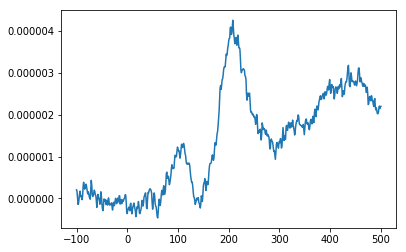

In [11]:
# plot out the epoched data averaged over all electrodes, images, and trials
epoched_data = epochs.get_data()
epoched_data = epoched_data.mean(axis=(0,1))

plt.figure(); plt.plot(np.arange(-100,501), epoched_data)

LaCie_dir = "/volumes/LaCie/megeeg_figs/"
plt.savefig(LaCie_dir + new_filename + "avg_over_conditions_trials_electrodes")

<bound method BaseEpochs.get_data of <Epochs  |   1315 events (all good), -0.1 - 0.5 sec, baseline [None, 0], ~452.5 MB, data loaded,
 '1': 16
 '10': 14
 '11': 17
 '12': 15
 '13': 15
 '14': 14
 '15': 16
 '16': 14
 '17': 16
 '18': 18
 '19': 12
 '2': 15
 '20': 16
 '21': 16
 '22': 14
 '23': 15
 '24': 13
 '25': 13
 '26': 15
 '27': 19
 '28': 13
 '29': 16
 '3': 14
 '30': 14
 '31': 15
 '32': 19
 '33': 11
 '34': 14
 '35': 13
 '36': 10
 '37': 17
 '38': 14
 '39': 17
 '4': 15
 '40': 16
 '41': 15
 '42': 13
 '43': 13
 '44': 15
 '45': 13
 '46': 15
 '47': 15
 '48': 13
 '49': 14
 '5': 13
 '50': 14
 '51': 14
 '52': 15
 '53': 12
 '54': 15
 '55': 14
 '56': 19
 '57': 13
 '58': 18
 '59': 13
 '6': 16
 '60': 15
 '61': 11
 '62': 16
 '63': 11
 '64': 14
 '65': 12
 '66': 12
 '67': 13
 '68': 17
 '69': 13
 '7': 15
 '70': 14
 '71': 11
 '72': 13
 '73': 14
 '74': 9
 '75': 15
 '76': 11
 '77': 12
 '78': 16
 '79': 16
 '8': 13
 '80': 10
 '81': 13
 '82': 13
 '83': 11
 '84': 14
 '85': 20
 '86': 18
 '87': 13
 '88': 14
 '89'

FileNotFoundError: [Errno 2] No such file or directory: '/volumes/LaCie/megeeg_figs/megeeg_subj16-avg_over_conditions_trials.png'

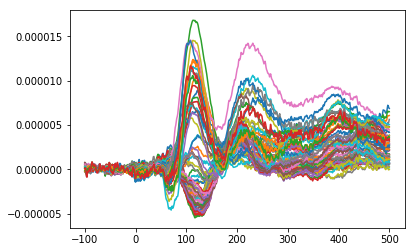

In [14]:
# plot out the epoched data averaged over all images and trials
epoched_data = epochs.get_data()
epoched_data = np.mean(epoched_data,axis=0) #average over conditions
plt.figure()
for electrode in epoched_data:
    plt.plot(np.arange(-100,501),electrode)

LaCie_dir = "/volumes/LaCie/megeeg_figs/"
plt.savefig(LaCie_dir + new_filename + "avg_over_conditions_trials")

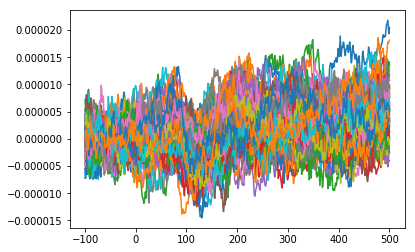

In [13]:
# plot out epoched data for one electrode averaged over all conditions and trials
electrode_num = 1
plt.figure()

for i in range(1,93):
    condition_data = epochs[str(i)].get_data()
    condition_data = np.mean(condition_data,axis=0)
    condition_data = condition_data[electrode_num,:]
    plt.plot(np.arange(-100,501),condition_data)

LaCie_dir = "/volumes/LaCie/megeeg_figs/"
plt.savefig(LaCie_dir+new_filename+"electrode"+str(electrode_num)+"_avg_over_conditions_trials")